In [1]:
#抓取特定作者文章
import os
import codecs
from collections import defaultdict

path = "C:\\Users\\user\\Desktop\\課業相關\\碩士班\\SNA\\meeting\\source\\自由中國\\"

name = ['孟瑤', '徐訏', '朱伴耘', '殷海光', '羅鴻詔', '胡適', '蔣勻田', '陳之藩', '雷震', '龍平甫']

file_list = []

for d in os.listdir(path):
    for file in os.listdir(path+d+'\\'):
        file_list.append(d+'\\'+file)
        
frequency = defaultdict(list)

for file in file_list:
    with codecs.open(path+file,'rb','utf8') as f:
        header = (f.readline().strip()).split()
        
        if len(header) >= 6 and header[5] in name:
            frequency[header[5]].append(file)
print ('END')

END


In [2]:
#jieba
import jieba
import time

jieba.load_userdict("dict.txt.big")

out_path = "C:\\Users\\user\\Desktop\\作者\\"
desktop_path = "C:\\Users\\user\\Desktop\\"

stop_word = []

with codecs.open('C:\\Users\\user\\Desktop\\課業相關\\論文資料\\stop2.txt','rb','utf8') as f:
    stop_word = [line.strip() for line in f.readlines()]

word_frequency = defaultdict(int)

for n in frequency:
    for file in frequency[n]:
        with codecs.open(path+file,'rb','utf8') as f:
            header = f.readline()
            content = (f.readline()).strip()
            text = [word.split('(')[0] for word in content.split() \
                    if len(word.split('(')) == 2 and word.split('(')[0] not in stop_word \
                    and 'CATEGORY' not in word.split('(')[1]]
            text = jieba.lcut(''.join(text),cut_all=False)
            for word in text:
                word_frequency[word] += 1 
            
            with codecs.open(out_path+n+'.txt','ab','utf8') as g:
                g.write(' '.join(text)+'\r\n')
print ('END')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 1.349 seconds.
Prefix dict has been built succesfully.


END


In [2]:
#CKIP
out_path = "C:\\Users\\user\\Desktop\\作者\\"
desktop_path = "C:\\Users\\user\\Desktop\\"

stop_word = []

with codecs.open(desktop_path+'stop.txt','rb','utf8') as f:
    stop_word = [line.strip() for line in f.readlines()]

word_frequency = defaultdict(int)

for n in frequency:
    for file in frequency[n]:
        with codecs.open(path+file,'rb','utf8') as f:
            header = f.readline()
            content = (f.readline()).strip()
            
            text = [word.split('(')[0] for word in content.split() \
                    if len(word.split('(')) == 2 and word.split('(')[0] not in stop_word \
                    and 'CATEGORY' not in word.split('(')[1]]
            for word in text:
                word_frequency[word] += 1 
            
            with codecs.open(out_path+n+'.txt','ab','utf8') as g:
                g.write(' '.join(text)+'\r\n')
print ('END')

END


81681
[('美國', 3938), ('政治', 3592), ('蘇俄', 3586), ('自由', 3381), ('可以', 3127), ('國家', 3049), ('問題', 2812), ('為', 2775), ('人民', 2722), ('不能', 2625)]


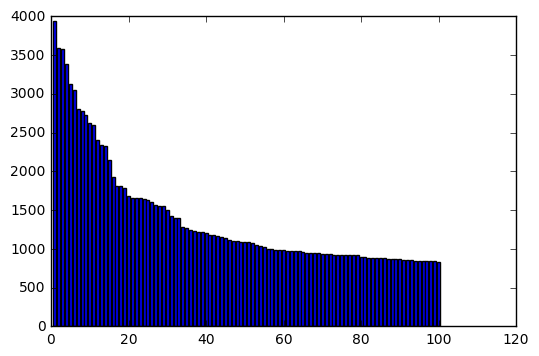

In [3]:
#查看作者間之高頻詞
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

sort_words = sorted(word_frequency.items(), key=lambda d:d[1], reverse = True)
print (len(sort_words))
print (sort_words[:10])

condicate = []
count = 0
for item in sort_words:
    '''if count % 50 == 0:
        #print (item[0],item[1])
        condicate.append(item[0])
    count += 1'''
    if count > 10:
        break
    condicate.append(item[0])
    count += 1

sort_words = OrderedDict(sort_words[:100])
    
xticks = np.arange(len(sort_words)) + 1
plt.bar(xticks, sort_words.values(), align='center')

#plt.xticks(xticks, list(sort_words.keys()))  
plt.show()

In [16]:
#訓練word2vec
from gensim.models import word2vec
import logging

out_path = "C:\\Users\\user\\Desktop\\作者\\"
desktop_path = "C:\\Users\\user\\Desktop\\"

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = word2vec.Text8Corpus(out_path+'雷震.txt')  # 加载语料
model = word2vec.Word2Vec(sentences, size=500,hs=1,sg=1,window=3)  
model.save_word2vec_format(desktop_path+"author.model.bin", binary=True)

2017-01-06 11:32:26,218 : INFO : collecting all words and their counts
2017-01-06 11:32:26,223 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-01-06 11:32:26,328 : INFO : collected 27656 word types from a corpus of 173501 raw words and 18 sentences
2017-01-06 11:32:26,329 : INFO : Loading a fresh vocabulary
2017-01-06 11:32:26,374 : INFO : min_count=5 retains 5163 unique words (18% of original 27656, drops 22493)
2017-01-06 11:32:26,375 : INFO : min_count=5 leaves 139139 word corpus (80% of original 173501, drops 34362)
2017-01-06 11:32:26,408 : INFO : deleting the raw counts dictionary of 27656 items
2017-01-06 11:32:26,412 : INFO : sample=0.001 downsamples 28 most-common words
2017-01-06 11:32:26,413 : INFO : downsampling leaves estimated 134900 word corpus (97.0% of prior 139139)
2017-01-06 11:32:26,415 : INFO : estimated required memory for 5163 words and 500 dimensions: 34592100 bytes
2017-01-06 11:32:26,431 : INFO : constructing a huffman tree from

In [17]:
condicate = ['美國', '政治', '蘇俄', '自由', '可以', '國家']
for i in condicate:
    find = i
    try:
        t = model.most_similar(find,topn=10)
        print ('和['+find+']最相關的詞有：\n')
        for item in t:
            print (item[0],item[1])
        print ('\n')
    except:
        continue

2017-01-06 11:32:38,975 : INFO : precomputing L2-norms of word weight vectors


和[美國]最相關的詞有：

侵略 0.8022507429122925
韓國 0.7685745358467102
仇恨 0.7668557167053223
輕視 0.7414167523384094
滿洲 0.7369207143783569
西方 0.7295137047767639
援助 0.7240198254585266
人 0.7205126881599426
幫助 0.7188200950622559
某個 0.7113369107246399


和[政治]最相關的詞有：

憲政 0.8306509256362915
多黨 0.820479154586792
法治 0.8151346445083618
及於 0.8118156790733337
奠定 0.8044267296791077
原動力 0.803136944770813
運行 0.7989235520362854
人才 0.7874300479888916
政黨政治 0.7869040369987488
政制 0.78598552942276


和[蘇俄]最相關的詞有：

中共 0.8315293192863464
全世界 0.8245103359222412
世界 0.81402188539505
共產 0.8131991624832153
共黨 0.8093457221984863
侵略 0.8040480613708496
共產黨 0.796289324760437
崩潰 0.7950185537338257
征服 0.7904800176620483
西方 0.7901591658592224


和[自由]最相關的詞有：

自由言論 0.7798780798912048
權利 0.7783753871917725
宗旨 0.7715815901756287
言論 0.766850471496582
集會結社 0.7654098868370056
半月刊 0.763784646987915
爭取 0.7504571676254272
雜誌 0.7237825393676758
意志 0.7198005318641663
講 0.7136387228965759


和[可以]最相關的詞有：

便 0.8159353137016296
試問 0.7800908088684082
